In [1]:
import os
from transformers import DetrImageProcessor, DetrForObjectDetection
import cv2
import shutil
from helper import *
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-stage1 and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [2]:
bd_configPath = 'models/bib_detector/RBNR2_custom-yolov4-tiny-detector.cfg'
bd_weightsPath = 'models/bib_detector/RBNR2_custom-yolov4-tiny-detector_best.weights'
bd_classes = ['bib']
bd = Detector(bd_configPath, bd_weightsPath, bd_classes)

human_processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
human_model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

extract_dir = "/Users/arpitsharma/Downloads/Extract"
organize_dir = "/Users/arpitsharma/Downloads/organized_photos"

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [36]:
path_to_file = "/Users/arpitsharma/Downloads/TBT/TBT 2023-1275.jpg"

img_cv2 = cv2.imread(path_to_file)
# img_cv2 = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
img_pil = Image.open(path_to_file)

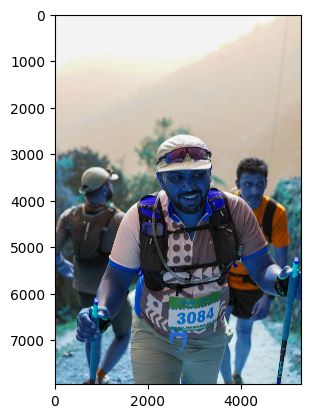

In [37]:
plt.imshow(img_cv2)

In [38]:
inputs = human_processor(images=img_pil, return_tensors="pt")
outputs = human_model(**inputs)

target_sizes = torch.tensor([img_pil.size[::-1]])
results = human_processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

In [39]:
results

{'scores': tensor([0.9443, 0.9611, 0.9984, 0.9753, 0.9617, 0.9823],
        grad_fn=<IndexBackward0>),
 'labels': tensor([ 1,  1,  1, 39, 27,  1]),
 'boxes': tensor([[7.9439e+02, 5.6980e+03, 1.7650e+03, 7.9292e+03],
         [1.4373e+00, 3.2852e+03, 1.5616e+03, 7.8791e+03],
         [4.3186e+02, 2.5718e+03, 5.1646e+03, 7.8361e+03],
         [4.7898e+03, 5.2412e+03, 5.2323e+03, 7.9244e+03],
         [1.7717e+03, 3.7279e+03, 3.9651e+03, 5.9594e+03],
         [3.6442e+03, 3.0689e+03, 5.0623e+03, 7.8882e+03]],
        grad_fn=<IndexBackward0>)}

In [46]:
score, label, box = results["scores"], results["labels"], results["boxes"]
box = [int(i) for i in box[2].tolist()]

In [47]:
human_cropped_pil = img_pil.crop((box[0], box[1], box[2], box[3]))
human_cropped_cv2 = img_cv2[box[1]:box[3], box[0]:box[2]]

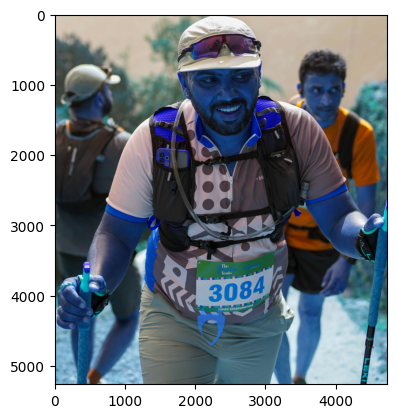

In [48]:
plt.imshow(human_cropped_cv2)

In [61]:
bib_detections = bd.detect(img_cv2, 0.5)

In [62]:
bib_detections

[['bib', [2607, 6315, 748, 435]]]

In [63]:
(x, y, w, h) = bib_detections[0][1]

cropped_bib_pil = img_pil.crop((x, y, x + w, y + h))
cropped_bib_cv2 = img_cv2[y:y+h, x:x+w]

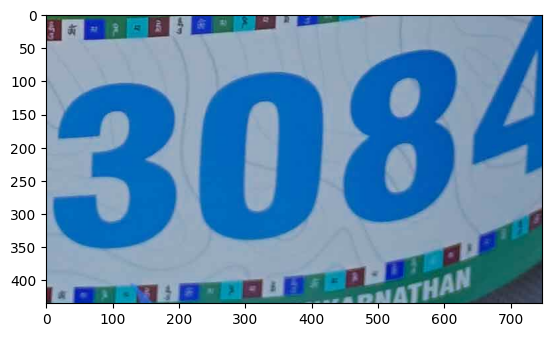

In [64]:
plt.imshow(cropped_bib_cv2)

In [65]:
process_image(cropped_bib_pil)

'3084'

In [8]:
for filename in os.listdir(extract_dir):

    img_cv2 = cv2.imread(os.path.join(extract_dir, filename))
    img_pil = Image.open(os.path.join(extract_dir, filename))

    inputs = human_processor(images=img_pil, return_tensors="pt")
    outputs = human_model(**inputs)

    target_sizes = torch.tensor([img_pil.size[::-1]])
    results = human_processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        box = [int(i) for i in box.tolist()]

        if human_model.config.id2label[label.item()] == "person" and round(score.item(), 3) > 0.90:
            human_cropped_pil = img_pil.crop((box[0], box[1], box[2], box[3]))
            human_cropped_cv2 = img_cv2[box[1]:box[3], box[0]:box[2]]
            
            bib_detections = bd.detect(human_cropped_cv2, 0.5)
#             print(filename, bib_detections)

            if len(bib_detections):
                (x, y, w, h) = bib_detections[0][1]

                cropped_bib_pil = human_cropped_pil.crop((x, y, x + w, y + h))
                cropped_bib_cv2 = human_cropped_cv2[y:y+h, x:x+w]
                
                bib_number = process_image(cropped_bib_pil)
                print(filename, bib_number)

40161775_1429457957185386_5440678869071822848_o.jpg [['bib', [227, 1011, 308, 128]]]
40161775_1429457957185386_5440678869071822848_o.jpg 1298
Copy of SSU22-1640.jpg []
Copy of SSU22-1640.jpg []
Copy of SSU22-1691.jpg [['bib', [284, 688, 303, 138]]]
Copy of SSU22-1691.jpg 1412
Copy of SSU22-1692.jpg [['bib', [637, 2123, 735, 356]]]
Copy of SSU22-1692.jpg 1412
Copy of SSU22-1489.jpg [['bib', [804, 1726, 525, 292]]]
Copy of SSU22-1489.jpg 3065
DSC_0475.jpg []
DSC_0475.jpg [['bib', [389, 1507, 431, 329]]]
DSC_0475.jpg 233
DSC_0475.jpg []
DSC_0475.jpg []
DSC_0475.jpg [['bib', [409, 1622, 488, 282]]]
DSC_0475.jpg 24
DSC_0475.jpg []
DSC_0475.jpg [['bib', [306, 1769, 528, 294]]]
DSC_0475.jpg 232
DSC_0298.jpg [['bib', [490, 993, 289, 257]], ['bib', [479, 1190, 292, 192]]]
DSC_0298.jpg 222
DSC_0298.jpg [['bib', [274, 761, 250, 137]]]
DSC_0298.jpg 41
DSC_0298.jpg [['bib', [501, 912, 318, 197]]]
DSC_0298.jpg 754ª
DSC_0299.jpg []
DSC_0299.jpg [['bib', [612, 1680, 653, 423]], ['bib', [678, 2083, 645